In [1]:
from mcnpy.serpent.parse_sens import load_sensitivity_file
from mcnpy.serpent.plotting import plot_energy_sensitivity

In [2]:
# Reload the parsing module to get the validation fix
import importlib
import mcnpy.serpent.parse_sens
importlib.reload(mcnpy.serpent.parse_sens)
from mcnpy.serpent.parse_sens import load_sensitivity_file

sf = load_sensitivity_file("/share_snc/snc/JuanMonleon/PhD_Year1_Workspace/SERPENT2.2/PWRSphere/full_composition/56-scale/test/PWRSphere.sss2_sens0.m")
print(sf.summary())

SERPENT Sensitivity File Summary
- Materials (1): SS304
- Nuclides (1): 26056
- Perturbations (7): e.g., MT=1, ela L=1, ela L=2, ela L=3, ela L=4...
- Responses (3): sens_ratio_BIN_0, sens_ratio_BIN_1, sens_ratio_BIN_2
- Energy bins: 56
- Mu bins (undocumented): 1


In [3]:
# Discover
print(sf.available_responses)                  # e.g. ['sens_ratio_BIN_0', 'sens_ratio_BIN_1', ...]
mt2 = sf.by_mt(2)                              # perturbations with MT=2

['sens_ratio_BIN_0', 'sens_ratio_BIN_1', 'sens_ratio_BIN_2']


In [4]:
# Data access with CLEAN intuitive parameters
# Using mt/leg parameters (like plotting functions)
vals, rel = sf.get_energy_dependent("sens_ratio_BIN_0", mat=0, zai=26056, mt=2)
vals_int, rel_int = sf.get_integrated("sens_ratio_BIN_0", mat=0, zai=0, leg=[1, 2, 3])

print(f"MT=2 energy dependent: shape={vals.shape}")
print(f"Legendre L=1,2,3 integrated: shape={vals_int.shape}")
print("✅ Clean interface - no deprecated 'pert' parameter!")

MT=2 energy dependent: shape=(0, 56)
Legendre L=1,2,3 integrated: shape=(0,)
✅ Clean interface - no deprecated 'pert' parameter!


In [5]:
# Tidy table for further analysis
df = sf.to_dataframe()

In [6]:
df

,response,material,nuclide,pert_index,pert_label,energy_group,value,rel_err,E_low,E_high
0,sens_ratio_BIN_0,SS304,26056,0,MT=1,0,0.000000,0.0,1.000000e-11,4.000000e-09
1,sens_ratio_BIN_0,SS304,26056,0,MT=1,1,0.000000,0.0,4.000000e-09,1.000000e-08
2,sens_ratio_BIN_0,SS304,26056,0,MT=1,2,0.000000,0.0,1.000000e-08,2.530000e-08
3,sens_ratio_BIN_0,SS304,26056,0,MT=1,3,0.000000,0.0,2.530000e-08,4.000000e-08
4,sens_ratio_BIN_0,SS304,26056,0,MT=1,4,0.000000,0.0,4.000000e-08,5.000000e-08
...,...,...,...,...,...,...,...,...,...,...
1171,sens_ratio_BIN_2,SS304,26056,6,ela L=6,51,-0.001750,1.0,1.500000e+00,1.850000e+00
1172,sens_ratio_BIN_2,SS304,26056,6,ela L=6,52,0.002527,1.0,1.850000e+00,3.000000e+00
1173,sens_ratio_BIN_2,SS304,26056,6,ela L=6,53,0.000000,0.0,3.000000e+00,4.304000e+00
1174,sens_ratio_BIN_2,SS304,26056,6,ela L=6,54,0.000000,0.0,4.304000e+00,6.434000e+00


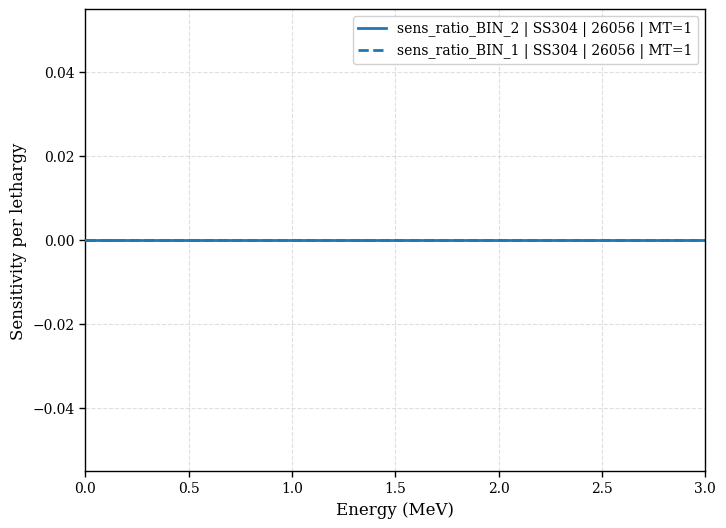

<Axes: xlabel='Energy (MeV)', ylabel='Sensitivity per lethargy'>

In [7]:
plot_energy_sensitivity(sf, ["sens_ratio_BIN_2", "sens_ratio_BIN_1"],
                        materials=[0], nuclides=[260560],
                        mt=[1, 2],
                        energy_range=(0, 3),
                        style='default')

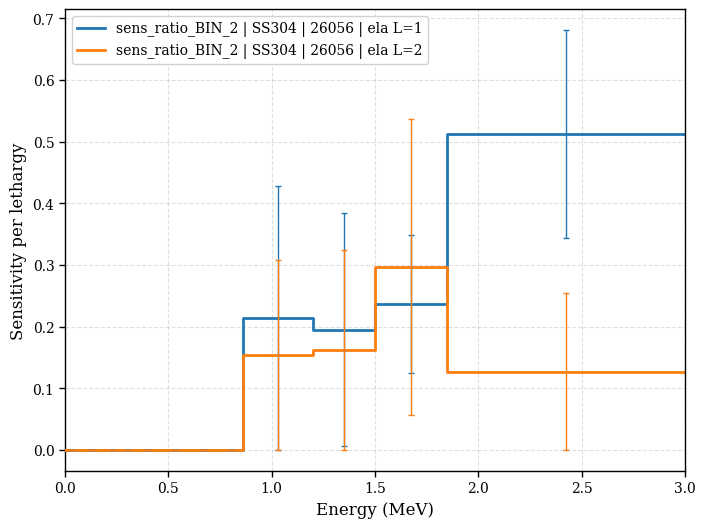

<Axes: xlabel='Energy (MeV)', ylabel='Sensitivity per lethargy'>

In [8]:
# Test plotting with the new file that includes Legendre moments
sf.plot_energy_sensitivity(["sens_ratio_BIN_2"], materials=0, nuclides=0,
                           mt=[4001, 4002], errorbars=True, 
                           style='default', energy_range=(0, 3))

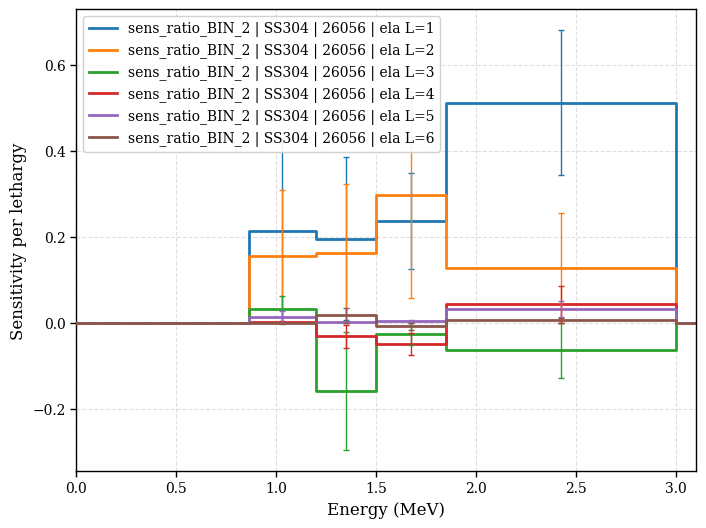

<Axes: xlabel='Energy (MeV)', ylabel='Sensitivity per lethargy'>

In [14]:
# Test plotting Legendre moments
sf.plot_energy_sensitivity(["sens_ratio_BIN_2"], materials=0, nuclides=0,
                           leg=[1, 2,3,4,5,6], errorbars=True, 
                           style='default', energy_range=(0, 3.1))

Testing leg parameter with orders 1, 2, 3...


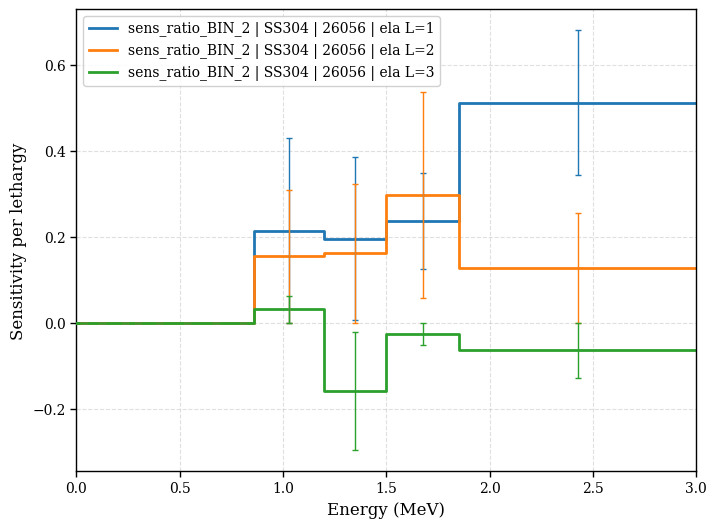

✅ leg parameter test completed!


In [10]:
# Reload the updated plotting module to get the MT 400X fix
import importlib
import mcnpy.serpent.plotting
importlib.reload(mcnpy.serpent.plotting)
from mcnpy.serpent.plotting import plot_energy_sensitivity

# Test that leg parameter now works correctly with MT 400X format
print("Testing leg parameter with orders 1, 2, 3...")
plot_energy_sensitivity(sf, ["sens_ratio_BIN_2"], materials=0, nuclides=0,
                        leg=[1, 2, 3], errorbars=True, 
                        style='default', energy_range=(0, 3))
print("✅ leg parameter test completed!")